In [2]:
from datetime import date
from nsepy import get_history
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
niftyit= get_history(symbol="NIFTYIT ",
                            start=date(2015,1,1),
                            end=date(2015,12,31),
                            index=True)

nifty=niftyit.loc[:,['Close']]
nifty=nifty.rename(index=str, columns={"Close": "nifty"})
nifty.tail()

,nifty
Date,


In [5]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file

source = ColumnDataSource(nifty)

p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
p.line('Date', 'nifty', source=source, color='blue')

output_file("niftytimeseries.html")
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: Close [renderer: GlyphRenderer(id='1079', ...)]


In [7]:

INFY = get_history(symbol='INFY',
                   start=date(2015,1,1),
                   end=date(2015,12,31))
infy=INFY.loc[:,['Close']]
infy=infy.rename(index=str, columns={"Close": "infy"})
infy.tail()

,infy
Date,
2015-12-24,1096.35
2015-12-28,1104.75
2015-12-29,1104.70
2015-12-30,1086.30
2015-12-31,1105.40


In [9]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file
infy.index=pd.to_datetime(infy.index)

source = ColumnDataSource(infy)

p = figure(x_axis_type="datetime", plot_width=800, plot_height=350)
p.line('Date', 'infy', source=source, color='blue')

output_file("infytimeseries.html")
show(p)

In [34]:
TCS = get_history(symbol='TCS',
                   start=date(2015,1,1),
                   end=date(2015,12,31))
tcs=TCS.loc[:,['Close']]
#type(tcs)
tcs=tcs.rename(index=str, columns={"Close": "tcs"})
tcs.tail(5)

,tcs
Date,
2015-12-24,2434.25
2015-12-28,2462.70
2015-12-29,2455.80
2015-12-30,2418.30
2015-12-31,2436.85


In [35]:
df_new = pd.concat([tcs, infy,nifty],axis=1)

In [36]:
df_new.head()

,tcs,infy,nifty
Date,,,
2015-01-01,2545.55,1974.40,11215.70
2015-01-02,2579.45,2013.20,11372.10
2015-01-05,2540.25,1995.90,11248.55
2015-01-06,2446.60,1954.20,10959.90
2015-01-07,2417.70,1963.55,10916.00


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 3 columns):
tcs      248 non-null float64
infy     248 non-null float64
nifty    248 non-null float64
dtypes: float64(3)
memory usage: 7.8+ KB


In [38]:
df_new.isnull().sum()

tcs      0
infy     0
nifty    0
dtype: int64

In [39]:
df_new.describe()

,tcs,infy,nifty
count,248.000000,248.000000,248.000000
mean,2537.717944,1547.978226,11585.626613
std,87.057814,529.468189,466.678465
min,2319.800000,937.500000,10798.250000
25%,2495.150000,1085.912500,11210.200000
50%,2541.475000,1149.325000,11503.850000
75%,2592.000000,2125.312500,11886.337500
max,2776.000000,2324.700000,12855.900000


In [40]:
df_clean=df_new.copy()

In [41]:
start_date = '2015-01-01'
end_date = '2015-12-31'

all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')


In [42]:
all_weekdays

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [43]:
df_new.index=pd.to_datetime(df_new.index)

df_month=df_new.resample('W').mean()
df_month=df_month.sort_index(ascending=True)
df_month.head(54)

,tcs,infy,nifty
Date,,,
2015-01-04,2562.500000,1993.800000,11293.9000
2015-01-11,2472.130000,1992.310000,11108.4500
2015-01-18,2520.160000,2117.210000,11598.0400
2015-01-25,2508.480000,2161.620000,11777.4900
2015-02-01,2517.087500,2142.112500,11787.9750
2015-02-08,2542.980000,2164.980000,12055.9700
2015-02-15,2482.970000,2283.870000,12298.5000
2015-02-22,2644.262500,2295.762500,12603.9250
2015-03-01,2677.941667,2279.383333,12567.3500


In [44]:
df_month.index

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
               '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
               '2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22',
               '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-19',
               '2015-04-26', '2015-05-03', '2015-05-10', '2015-05-17',
               '2015-05-24', '2015-05-31', '2015-06-07', '2015-06-14',
               '2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
               '2015-07-19', '2015-07-26', '2015-08-02', '2015-08-09',
               '2015-08-16', '2015-08-23', '2015-08-30', '2015-09-06',
               '2015-09-13', '2015-09-20', '2015-09-27', '2015-10-04',
               '2015-10-11', '2015-10-18', '2015-10-25', '2015-11-01',
               '2015-11-08', '2015-11-15', '2015-11-22', '2015-11-29',
               '2015-12-06', '2015-12-13', '2015-12-20', '2015-12-27',
               '2016-01-03'],
              dtype='datetime64[ns]', name='Dat

In [45]:
df_month=df_month.sort_index(ascending=True)
df_month=df_month.loc['2015-01-25':'2015-12-27':12,:]
df_month.tail()

,tcs,infy,nifty
Date,,,
2015-01-25,2508.480,2161.62,11777.4900
2015-04-19,2585.225,2206.60,12087.6000
2015-07-12,2568.300,959.36,11000.4400
2015-10-04,2603.650,1140.60,11901.2375
2015-12-27,2427.875,1096.10,11175.1875


In [47]:
#or calculating weeklyaverage by series method
    
days=[]
weeks=[]
for x in range(28,364,84):
    days.append(x)
for x in range(4,52,12):
    weeks.append(x)
    
    
for ndays,i in zip(days,weeks):
    
    
    
    
    #df_new['niftyweek'+ str(i)] = df_month['nifty']
        
    df_clean['niftyweek'+ str(i)] = pd.Series((df_new['nifty']).rolling(window=ndays).mean(),name = 'niftyweek'+ str(i), index=df_new.index) 
    df_clean['infyweek'+ str(i)] = pd.Series((df_new['infy']).rolling(window=ndays).mean(),name = 'infyweek'+ str(i), index=df_new.index) 
    df_new['tcsweek'+ str(i)] = pd.Series((df_new['tcs']).rolling(window=ndays).mean(),name = 'infyweek'+ str(i), index=df_new.index)     
        

In [47]:
df_new.tail(7)

,tcs,infy,nifty
Date,,,
2015-12-22,2405.05,1083.75,11095.45
2015-12-23,2425.80,1100.85,11195.65
2015-12-24,2434.25,1096.35,11184.90
2015-12-28,2462.70,1104.75,11271.80
2015-12-29,2455.80,1104.70,11253.45
2015-12-30,2418.30,1086.30,11117.60
2015-12-31,2436.85,1105.40,11212.55


In [48]:
'''  Create rolling window of size 10 on each stock/index '''





infy = df_clean.loc[:, 'infy']
tcs = df_clean.loc[:, 'tcs']
nifty = df_clean.loc[:, 'nifty']

# Calculate the 10 and 75 days moving averages of the closing prices
short_rolling_infy = infy.rolling(window=10).mean()
long_rolling_infy = infy.rolling(window=75).mean()

short_rolling_tcs = tcs.rolling(window=10).mean()
long_rolling_tcs = tcs.rolling(window=75).mean()

short_rolling_nifty = nifty.rolling(window=10).mean()
long_rolling_nifty = nifty.rolling(window=75).mean()



In [56]:
short_rolling_nifty

Date
2015-01-01           NaN
2015-01-02           NaN
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
2015-01-08           NaN
2015-01-09           NaN
2015-01-12           NaN
2015-01-13           NaN
2015-01-14           NaN
2015-01-15           NaN
2015-01-16           NaN
2015-01-19           NaN
2015-01-20           NaN
2015-01-21           NaN
2015-01-22           NaN
2015-01-23           NaN
2015-01-27           NaN
2015-01-28           NaN
2015-01-29    11516.7425
2015-01-30    11547.1950
2015-02-02    11575.7875
2015-02-03    11611.5550
2015-02-04    11660.5050
2015-02-05    11722.9625
2015-02-06    11785.4525
2015-02-09    11827.9350
2015-02-10    11858.8950
2015-02-11    11895.9250
2015-02-12    11933.8100
                 ...    
2015-11-18    11396.9575
2015-11-19    11372.1225
2015-11-20    11350.6125
2015-11-23    11329.0725
2015-11-24    11303.1225
2015-11-26    11276.0925
2015-11-27    11250.0725
2015-11-30    11232.9650
2015-12-01    11221.

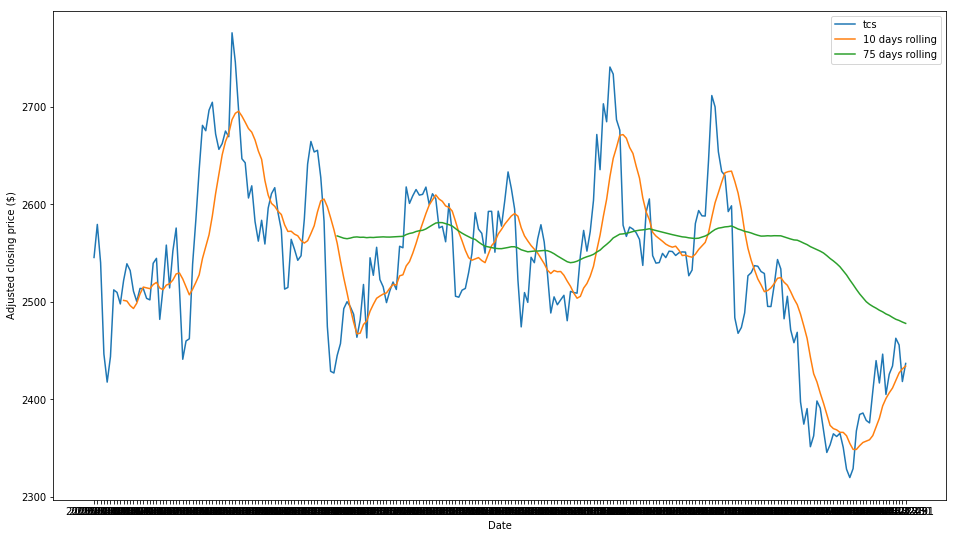

In [49]:



fig, ax = plt.subplots(figsize=(16,9))

ax.plot(tcs.index, tcs, label='tcs')
ax.plot(short_rolling_tcs.index, short_rolling_tcs, label='10 days rolling')
ax.plot(long_rolling_tcs.index, long_rolling_tcs, label='75 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

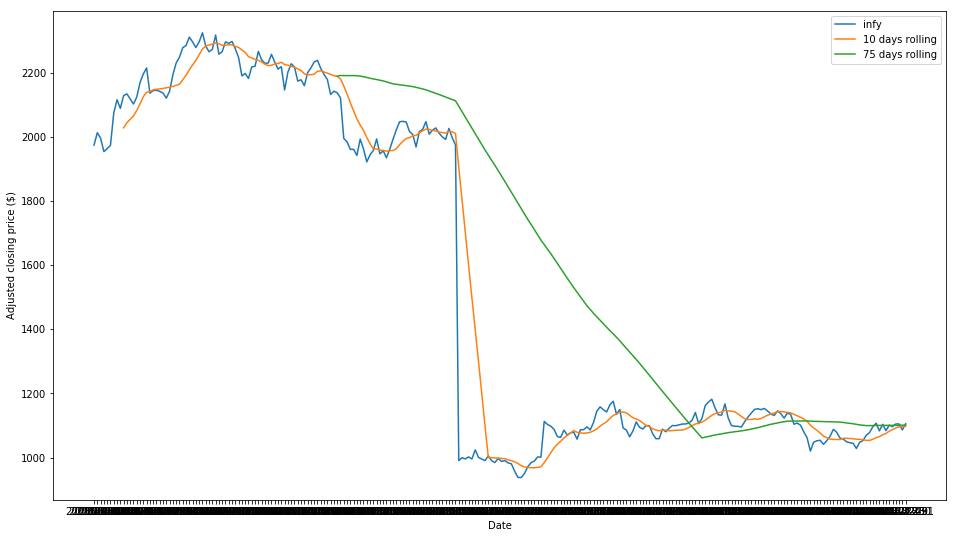

In [50]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(infy.index, infy, label='infy')
ax.plot(short_rolling_infy.index, short_rolling_infy, label='10 days rolling')
ax.plot(long_rolling_infy.index, long_rolling_infy, label='75 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

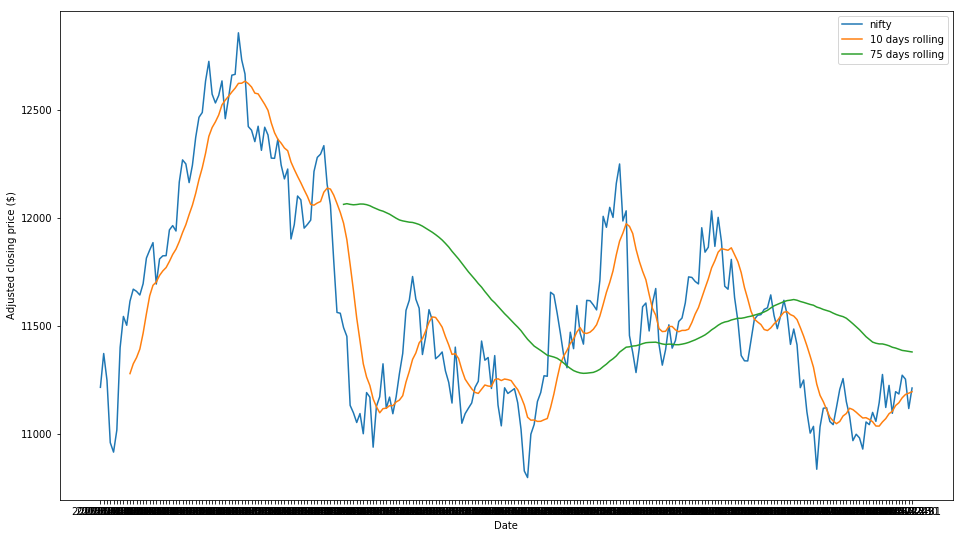

In [51]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(nifty.index, nifty, label='nifty')
ax.plot(short_rolling_nifty.index, short_rolling_nifty, label='10 days rolling')
ax.plot(long_rolling_nifty.index, long_rolling_nifty, label='75 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()